# Task 2

Use `Iris` dataset to perform basic Statistical analysis on the data and find the data trends. 

In [5]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt

## Loading and Statistical Analysis

You can load the data into the pandas using the `read_csv` function in pandas

In [2]:
# importing the dataset into the notebook
data = pd.read_csv('./Iris.csv', sep=',', encoding='latin-1')

# calculating Mean, Mode, Median, Standard Deviation, Correlation Coefficient
# only selecting columns 1-5 which actually have numeric data that we can actually use
# to calculate
median = data[data.columns[1:5]].median()
mode = data[data.columns[1:5]].mode()
mean = data[data.columns[1:5]].mean()
standard_deviation = data[data.columns[1:5]].std()
correlation_coefficient = data[data.columns[1:5]].corr()

In [3]:
# display all the calculations
print("\nMEDIAN\n")
print(median)
print("\nMODE\n")
print(mode)
print("\nMEAN\n")
print(mean)
print("\nSTANDARD DEVIATION\n")
print(standard_deviation)
print("\nCORRELATION COEFFICIENT\n")
print(correlation_coefficient)


MEDIAN

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

MODE

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.0           3.0            1.5           0.2

MEAN

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

STANDARD DEVIATION

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64

CORRELATION COEFFICIENT

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


## Plotting and Visualizing

We can now use the `matplotlib` library to plot the graphs and see the data trend which is quite helpful in making our assumptions with the data and later on for machine learning models such as regression.

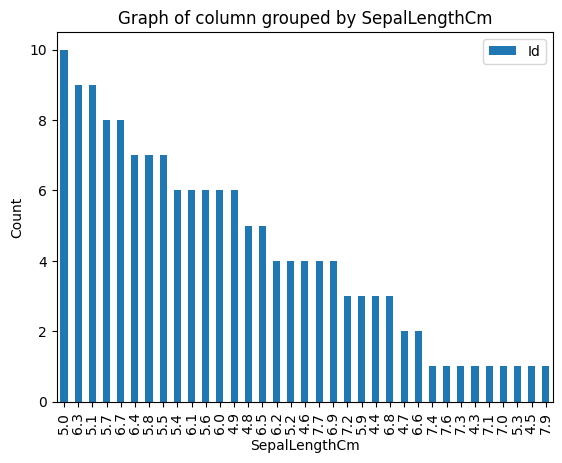

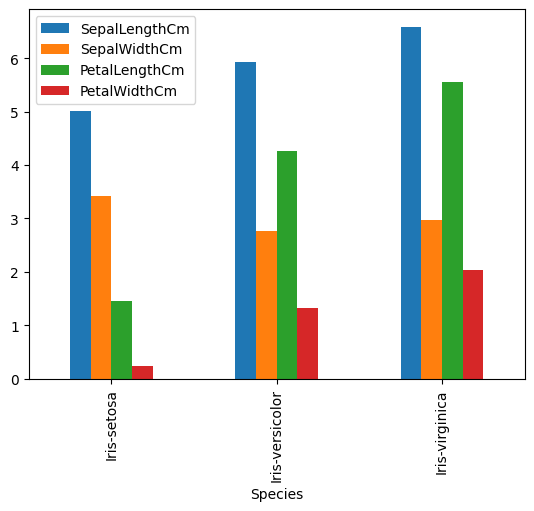

In [7]:
# extracting sepal length cm column
sepal_length = pd.DataFrame(data.groupby("SepalLengthCm", observed=True).count()["Id"]).sort_values(by=["Id"], ascending=False)

# plotting the graph
sepal_length.plot(kind="bar")
plt.xlabel("SepalLengthCm")
plt.ylabel("Count")
plt.title("Graph of column grouped by SepalLengthCm")
plt.show()

species = pd.DataFrame(data.groupby("Species").mean()).iloc[0::, 1::]
species.reset_index(inplace=True)

species.plot(kind="bar", x="Species")
plt.show()

## Linear Regression

We have already reviewed from the above calculations when we calculated the correlation coefficient that there are many linear relationships in the dataset. We can confirm that by actually visualizing the dataset and drawing a line between the data to actually calculate the dataset.

This can be achieved by using `LinearRegression` class from the `sklearn.linear_model`.

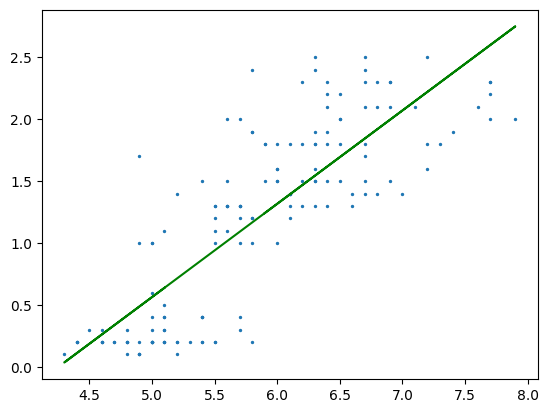

In [9]:
# importing the packages
from sklearn.linear_model import LinearRegression

# drawing dots for the scatter plot
plt.scatter(data["SepalLengthCm"], data["PetalWidthCm"], label="Data Points", s=2)

# Calculating linear regression
model = LinearRegression()
x = data[["SepalLengthCm"]]
y = data["PetalWidthCm"]
model.fit(x, y)

# drawing the line on the graph for the linear regression
plt.plot(data['SepalLengthCm'], model.predict(x), color='green', label='Linear Regression')

# display the graph
plt.show()

## Insights and Report

We have analyzed the dataset and found that there are many clear `linear` relationships between several datasets which are as follow:
 - SepalLengthCm - PetalLengthCm
 - SepalLengthCm - PetalWidthCm
 - PetalLengthCm - SepalLengthCm
 - PetalLengthCm - PetalWidthCm
 - PetalWidthCm - PetalLengthCm
 - SepalLengthCm - PetalWidthCm

The largest of the followers are of the kind `Iris Virginica`

We have more quantity of larger flowers than the smaller ones.